In [1]:
# DATES ANS TIMES IN PYTHON
# ---
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
date.strftime('%A')

'Saturday'

In [4]:
# --- Typed arrays of times: NumPy’s datetime64 ---
# The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly. The date
# time64 requires a very specific input format:
import numpy as np
date = np.array('2017-07-04', dtype=np.datetime64)
date

array('2017-07-04', dtype='datetime64[D]')

In [5]:
date + np.arange(12)

array(['2017-07-04', '2017-07-05', '2017-07-06', '2017-07-07',
       '2017-07-08', '2017-07-09', '2017-07-10', '2017-07-11',
       '2017-07-12', '2017-07-13', '2017-07-14', '2017-07-15'],
      dtype='datetime64[D]')

In [6]:
# One detail of the datetime64 and timedelta64 objects is that they are built on a fun‐
# damental time unit. Because the datetime64 object is limited to 64-bit precision, the
# range of encodable times is 264 times this fundamental unit. In other words, date
# time64 imposes a trade-off between time resolution and maximum time span.

In [7]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [8]:
# --- Dates and times in Pandas: Best of both worlds ---
# Pandas builds upon all the tools just discussed to provide a Timestamp object, which
# combines the ease of use of datetime and dateutil with the efficient storage and
# vectorized interface of numpy.datetime64.
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [9]:
date.strftime('%A')

'Saturday'

In [10]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [11]:
# PANDAS TIME SERIES: INDEXING BY TIME
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [12]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [14]:
# PANDAS TIME SERIES DATA STRUCTURES
# Passing a single date to pd.to_datetime() yields a Timestamp; passing a series of dates by default yields a DatetimeIndex:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [15]:
# Any DatetimeIndex can be converted to a PeriodIndex with the to_period() function with the addition of a frequency code; 
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [16]:
# A TimedeltaIndex is created, for example, when one date is subtracted from another:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [17]:
# --- Regular sequences: pd.date_range() ---
# To make the creation of regular date sequences more convenient, Pandas offers a few
# functions for this purpose: pd.date_range() for timestamps, pd.period_range() for
# periods, and pd.timedelta_range() for time deltas. 

In [18]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [19]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
 pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [21]:
# To create regular sequences of period or time delta values, the very similar
# pd.period_range() and pd.timedelta_range() functions are useful.
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [22]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [23]:
# FREQUENCIES AND OFFSETS
# Fundamental to these Pandas time series tools is the concept of a frequency or date
# offset. Just as we saw the D (day) and H (hour) codes previously, we can use such codes
# to specify any desired frequency spacing. 
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [24]:
# All of these short codes refer to specific instances of Pandas time series offsets, which
# can be found in the pd.tseries.offsets module. 
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [27]:
# RESAMPLING, SHIFTING, AND WINDOWING
# The ability to use dates and times as indices to intuitively organize and access data is
# an important piece of the Pandas time series tools
from pandas_datareader import data
yahoo = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
yahoo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [29]:
yahoo = yahoo['Close']

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<AxesSubplot:xlabel='Date'>

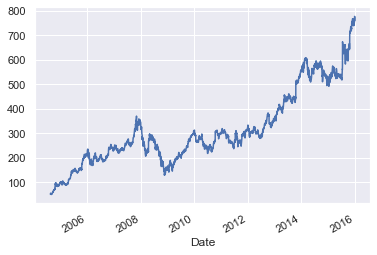

In [31]:
yahoo.plot()

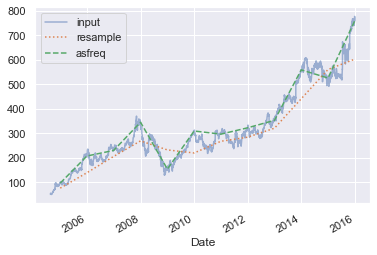

In [32]:
# --- Resampling and converting values ---
# One common need for time series data is resampling at a higher or lower frequency
yahoo.plot(alpha=0.5, style='-')
yahoo.resample('BA').mean().plot(style=':')
yahoo.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],
            loc='upper left');

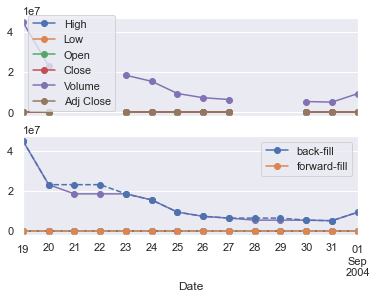

In [33]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

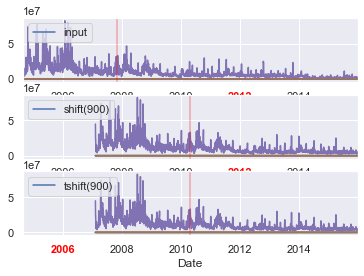

In [39]:
# --- Time Shift ---
# Another common time series–specific operation is shifting of data in time. Pandas
# has two closely related methods for computing this: shift() and tshift()
fig, ax = plt.subplots(3, sharey=True)
# apply a frequency to the data
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.shift(900).plot(ax=ax[2])
# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');